In [14]:
!pip install pandas
!pip install numpy
!pip install joblib
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\арбуз2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\арбуз2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\арбуз2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\арбуз2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\арбуз2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\арбуз2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os

Анализ данных в train.csv

In [19]:
train = pd.read_csv(r"C:\Users\арбуз2\OneDrive\Документы\GitHub\keys2shamalet\data\train.csv", low_memory=False) 


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


Удаление аномалий на основе межквартильного размаха (IQR)

In [22]:
import pandas as pd

def remove_outliers_iqr(df, columns=None, threshold=3):
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns  # Автоматически выбрать числовые столбцы
    
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Первый квартиль
        Q3 = df[col].quantile(0.75)  # Третий квартиль
        IQR = Q3 - Q1  # Межквартильный размах
        
        lower_bound = Q1 - threshold * IQR  # Нижняя граница
        upper_bound = Q3 + threshold * IQR  # Верхняя граница
        
        # Фильтрация данных: оставить только значения в допустимых пределах
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Шаг 1: Загрузка данных
train_1 = pd.read_csv(r"C:\Users\арбуз2\OneDrive\Документы\GitHub\keys2shamalet\data\train.csv", low_memory=False)

# Шаг 2: Удаление аномалий из всех числовых столбцов
train_cleaned_no_outliers = remove_outliers_iqr(train)

# Проверка результатов
print("Размер данных до удаления аномалий:", train.shape)
print("Размер данных после удаления аномалий:", train_cleaned_no_outliers.shape)

# Шаг 3: Сохранение обработанных данных
train_cleaned_no_outliers.to_csv(r"C:\Users\арбуз2\OneDrive\Документы\GitHub\keys2shamalet\train_1.csv", index=False)
print("Данные без аномалий сохранены в 'train_1.csv'.")


Размер данных до удаления аномалий: (14456, 2666)
Размер данных после удаления аномалий: (0, 2666)
Данные без аномалий сохранены в 'train_1.csv'.


In [23]:
train_1

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


Анализ данных в valid.csv

In [25]:
valid = pd.read_csv(r"C:\Users\арбуз2\OneDrive\Документы\GitHub\keys2shamalet\data\valid.csv", low_memory=False) 


In [26]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 2666 entries, report_date to col2663
dtypes: float64(2329), int64(3), object(334)
memory usage: 74.1+ MB


Удаление аномалий на основе межквартильного размаха (IQR)

In [27]:
import pandas as pd

def remove_outliers_iqr(df, columns=None, threshold=3):
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns  # Автоматически выбрать числовые столбцы
    
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Первый квартиль
        Q3 = df[col].quantile(0.75)  # Третий квартиль
        IQR = Q3 - Q1  # Межквартильный размах
        
        lower_bound = Q1 - threshold * IQR  # Нижняя граница
        upper_bound = Q3 + threshold * IQR  # Верхняя граница
        
        # Фильтрация данных: оставить только значения в допустимых пределах
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Шаг 1: Загрузка данных
valid_1 = pd.read_csv(r"C:\Users\арбуз2\OneDrive\Документы\GitHub\keys2shamalet\data\valid.csv", low_memory=False)

# Шаг 2: Удаление аномалий из всех числовых столбцов
valid_cleaned_no_outliers = remove_outliers_iqr(valid)

# Проверка результатов
print("Размер данных до удаления аномалий:", valid.shape)
print("Размер данных после удаления аномалий:", valid_cleaned_no_outliers.shape)

# Шаг 3: Сохранение обработанных данных
valid_cleaned_no_outliers.to_csv(r"C:\Users\арбуз2\OneDrive\Документы\GitHub\keys2shamalet\valid_1.csv", index=False)
print("Данные без аномалий сохранены в 'valid_1.csv'.")

Размер данных до удаления аномалий: (3642, 2666)
Размер данных после удаления аномалий: (0, 2666)
Данные без аномалий сохранены в 'valid_1.csv'.


In [28]:
valid_1

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,2023-04-01,4366,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3500000.0,3500000.0,3500000.0,0.256261
3638,2023-04-01,8298,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3639,2023-03-01,835,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256919
3640,2023-03-01,8300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217


In [29]:
train_1

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


Очистка данных

Визуализация пропусков

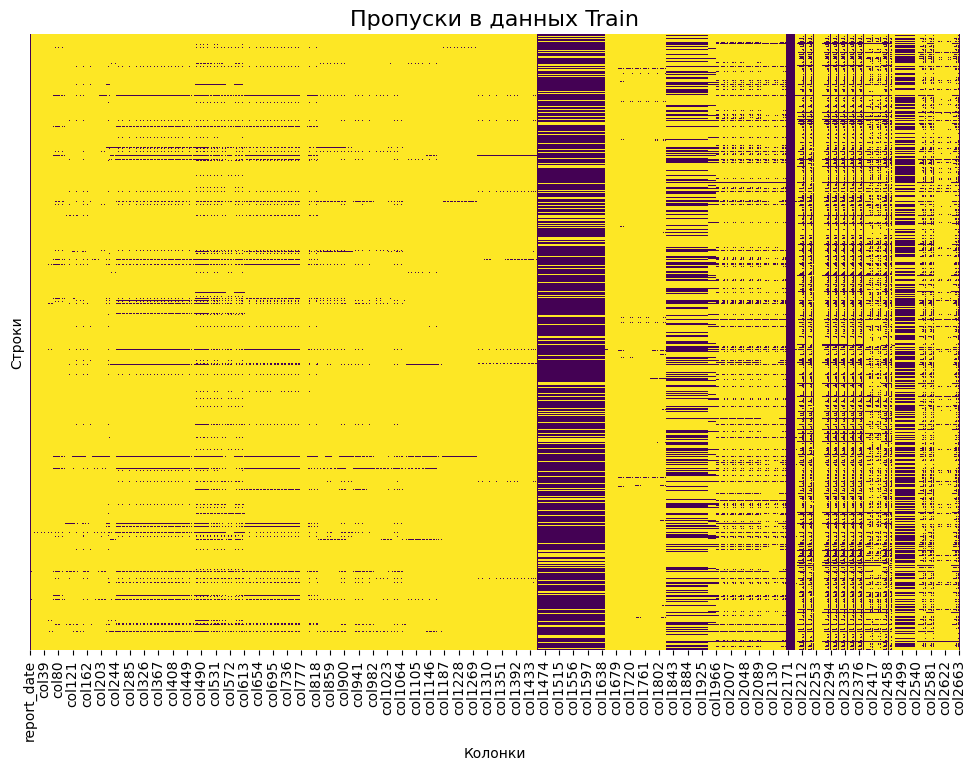

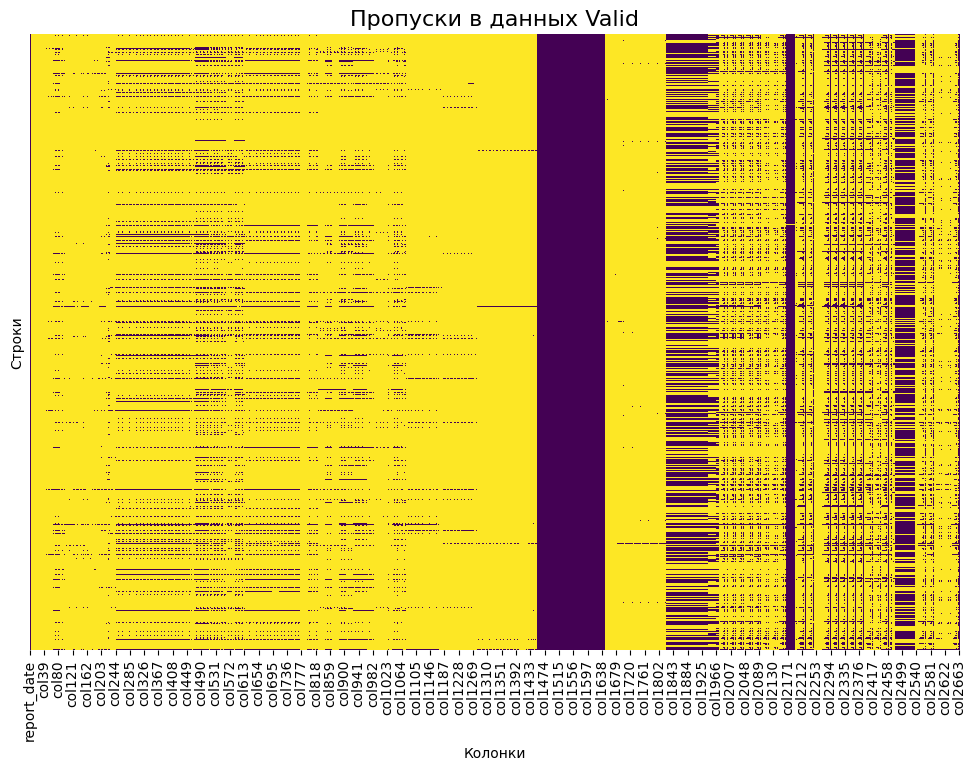

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Рассчитаем долю пропусков для каждого набора данных
train_missing_fraction = train_1.isnull().mean()
valid_missing_fraction = valid_1.isnull().mean()

# Рассчитаем максимальную долю пропусков для каждой колонки между train и valid
combined_missing_fraction = pd.concat([train_missing_fraction, valid_missing_fraction], axis=1).max(axis=1)

# Визуализация пропусков в train
plt.figure(figsize=(12, 8))
sns.heatmap(train_1.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Train", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()

# Визуализация пропусков в valid
plt.figure(figsize=(12, 8))
sns.heatmap(valid_1.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Valid", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()


Удаление колонок с пропусками >30% и колонок с комбинированным типом данных

In [31]:
threshold = 0.7

# Рассчитаем долю пропусков для каждого набора данных
train_missing_fraction = train_1.isnull().mean()
valid_missing_fraction = valid_1.isnull().mean()

# Рассчитаем максимальную долю пропусков для каждой колонки между train и valid
combined_missing_fraction = pd.concat([train_missing_fraction, valid_missing_fraction], axis=1).max(axis=1)

# Определяем колонки для удаления, где доля пропусков больше threshold в обоих наборах данных
columns_to_drop = combined_missing_fraction[combined_missing_fraction > threshold].index

# Удаляем колонки с большим количеством пропусков
train_cleaned = train_1.drop(columns=columns_to_drop)
valid_cleaned = valid_1.drop(columns=columns_to_drop)

# Проверяем, совпадают ли структуры после удаления колонок с пропусками
if sorted(train_cleaned.columns) != sorted(valid_cleaned.columns):
    raise ValueError("Структуры train и valid не совпадают после удаления колонок с пропусками!")
else:
    print("Структуры train и valid совпадают после удаления колонок с пропусками.")

# Функция для проверки наличия одновременно float и object
def has_mixed_types(column):
    types = set(column.dropna().map(type))  # Собираем все типы в колонке, игнорируя NaN
    return float in types and str in types

# Определяем колонки с разными типами данных
mixed_type_columns_train = [col for col in train_cleaned.columns if has_mixed_types(train_cleaned[col])]
mixed_type_columns_valid = [col for col in valid_cleaned.columns if has_mixed_types(valid_cleaned[col])]

# Удаляем эти колонки из обоих наборов данных
columns_to_drop_mixed = set(mixed_type_columns_train).union(mixed_type_columns_valid)
train_cleaned = train_cleaned.drop(columns=columns_to_drop_mixed)
valid_cleaned = valid_cleaned.drop(columns=columns_to_drop_mixed)

# Проверяем, совпадают ли структуры после дополнительной чистки
if sorted(train_cleaned.columns) != sorted(valid_cleaned.columns):
    raise ValueError("Структуры train и valid не совпадают после удаления колонок с разными типами данных!")
else:
    print("Структуры train и valid теперь совпадают после удаления колонок с разными типами данных.")

# Сохраняем обработанные данные в новые файлы
train_cleaned.to_csv('train_cleaned.csv', index=False)
valid_cleaned.to_csv('valid_cleaned.csv', index=False)

print("Обработанные файлы сохранены как 'train_cleaned.csv' и 'valid_cleaned.csv'.")

Структуры train и valid совпадают после удаления колонок с пропусками.
Структуры train и valid теперь совпадают после удаления колонок с разными типами данных.
Обработанные файлы сохранены как 'train_cleaned.csv' и 'valid_cleaned.csv'.


Заполнение пропусков

In [33]:
# Заполнение пропущенных значений
for col in valid_cleaned.columns:
    if valid_cleaned[col].dtype in ['float64', 'int64']:  # Если колонка числовая
        valid_cleaned[col] = valid_cleaned[col].fillna(valid_cleaned[col].median())
    elif valid_cleaned[col].dtype == 'object':  # Если колонка текстовая
        valid_cleaned[col] = valid_cleaned[col].fillna('unknown')


In [34]:
# Заполнение пропущенных значений
for col in train_cleaned.columns:
    if train_cleaned[col].dtype in ['float64', 'int64']:  # Если колонка числовая
        train_cleaned[col] = train_cleaned[col].fillna(train_cleaned[col].median())
    elif train_cleaned[col].dtype == 'object':  # Если колонка текстовая
        train_cleaned[col] = train_cleaned[col].fillna('unknown')


In [35]:
valid_cleaned.head()

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2582,col2583,col2584,col2588,col2589,col2590,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,0,01016bd5-10dc-ec11-b823-005056b825cd,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,0,0151dccf-0ecb-ed11-b828-005056b81dee,0.0,0.0,1.0,1.0,1.0,...,360.0,360.0,360.0,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,0,074ce8a6-859a-4084-a1c6-41343a94a856,0.0,0.0,0.0,0.0,0.0,...,348.0,348.0,348.0,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,0,08e72a9b-74fd-450a-982e-a8cede3facb3,0.0,0.0,0.0,0.0,0.0,...,360.0,360.0,360.0,300.0,300.0,300.0,6841532.0,6600000.0,6733329.5,0.256261
4,2023-03-01,14,0,0,0a033230-3889-4239-8900-0ffb7e48958c,0.0,0.0,0.0,0.0,0.0,...,360.0,360.0,360.0,362.0,362.0,362.0,10391000.0,10391000.0,10391000.0,0.257348


In [36]:
train_cleaned.head()

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2582,col2583,col2584,col2588,col2589,col2590,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,242.0,242.0,242.0,242.0,242.0,242.0,6244578.0,6146773.5,6225550.0,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,242.0,242.0,242.0,242.0,242.0,242.0,6244578.0,6146773.5,6225550.0,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,242.0,242.0,242.0,242.0,242.0,242.0,6244578.0,6146773.5,6225550.0,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,242.0,242.0,242.0,242.0,242.0,242.0,6244578.0,6146773.5,6225550.0,0.254164


Визуализация данных на пропуски после обработки

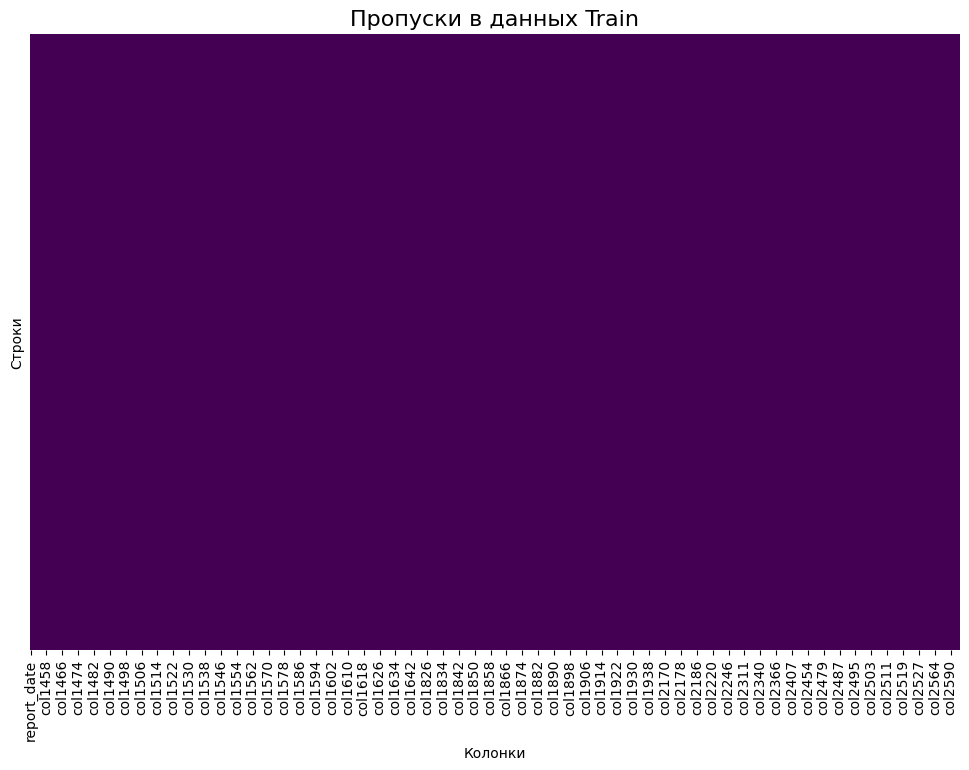

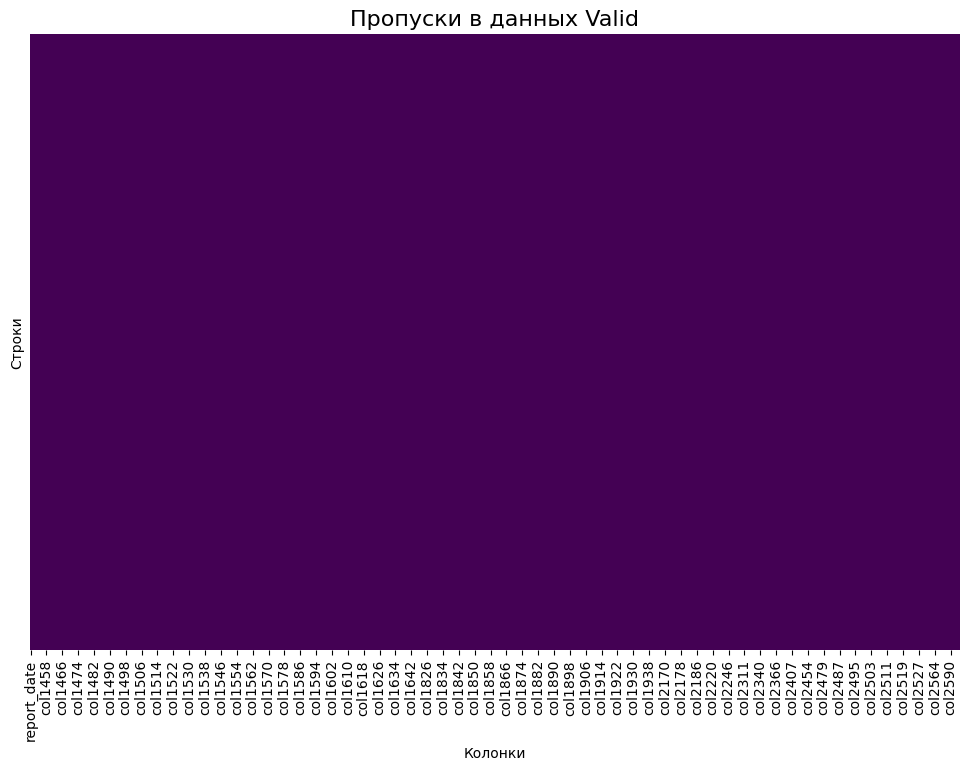

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Рассчитаем долю пропусков для каждого набора данных
train_missing_fraction = train_cleaned.isnull().mean()
valid_missing_fraction = valid_cleaned.isnull().mean()

# Рассчитаем максимальную долю пропусков для каждой колонки между train и valid
combined_missing_fraction = pd.concat([train_missing_fraction, valid_missing_fraction], axis=1).max(axis=1)

# Визуализация пропусков в train
plt.figure(figsize=(12, 8))
sns.heatmap(train_cleaned.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Train", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()

# Визуализация пропусков в valid
plt.figure(figsize=(12, 8))
sns.heatmap(valid_cleaned.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Valid", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()


Обучение модели №1 с помощью RandomForestClassifier

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



X = train_cleaned.drop(columns=['client_id', 'target', 'report_date'])
y = train_cleaned['target']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[categorical_features] = X[categorical_features].astype(str)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model.fit(X_train, y_train)

test_preds = model.predict_proba(X_test)[:, 1]
test_score = roc_auc_score(y_test, test_preds)
print(f"ROC-AUC на тестовых данных: {test_score:.4f}")

submission = pd.DataFrame({'client_id': train.loc[X_test.index, 'client_id'], 'score': test_preds})
submission.to_csv('submission_file.csv', index=False)
print("Результаты сохранены в submission_file.csv")

ImportError: cannot import name '_is_pandas_na' from 'sklearn.utils' (C:\Users\арбуз2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\__init__.py)

Применение модели

In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

# Загрузка данных valid_cleaned

X_valid = valid_cleaned.drop(columns=['client_id', 'target', 'report_date'], errors='ignore')
y_valid = valid_cleaned['target']

# Преобразование категориальных признаков

# Преобразуем категориальные признаки в строковый формат
X_valid[categorical_features] = X_valid[categorical_features].astype(str)

# Предсказание с использованием обученной модели

# Используем уже обученный Pipeline 'model'
valid_preds = model.predict_proba(X_valid)[:, 1]

# Оценка ROC-AUC на valid данных

valid_score = roc_auc_score(y_valid, valid_preds)
print(f"ROC-AUC на valid данных: {valid_score:.4f}")


# Сохранение результатов

submission_valid = pd.DataFrame({
    'client_id': valid_cleaned['client_id'],
    'score': valid_preds
})

submission_valid.to_csv('submission_valid_randomforest.csv', index=False)
print("Результаты сохранены в submission_valid_randomforest.csv")


NameError: name 'categorical_features' is not defined

Визуализация ROC-AUC кривой

In [43]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, test_preds)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, test_preds):.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Диагональная линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


NameError: name 'y_test' is not defined

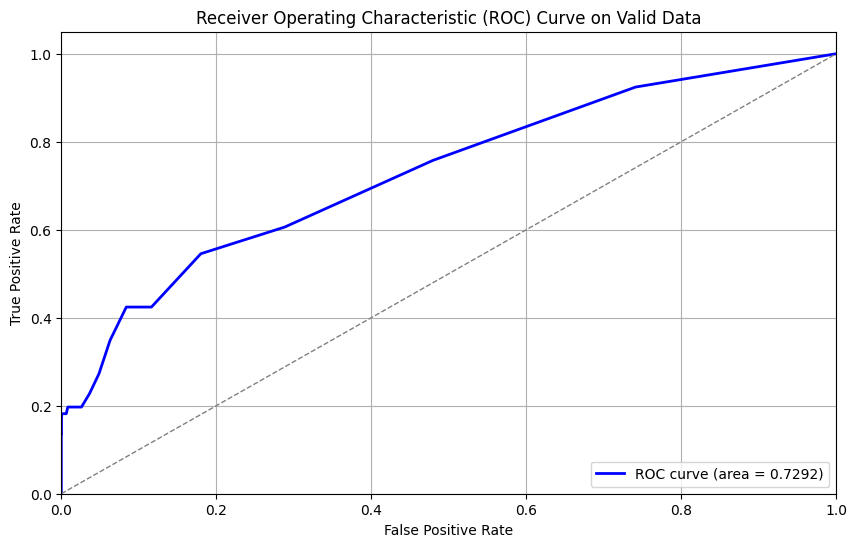

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr_valid, tpr_valid, _ = roc_curve(y_valid, valid_preds)

plt.figure(figsize=(10, 6))
plt.plot(fpr_valid, tpr_valid, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_score(y_valid, valid_preds):.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Диагональная линия для случайной модели
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Valid Data')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
